In [1]:
#cluster of COuntries
# day wise data structure D0 to Dn
# attributes of a timeseriess
# how we are placed compared to other countries
#lockdown impact on graphs
#day wise story time  graphs of countries
#predictions of countries
# predictions of the countries compared to actual

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing,cross_decomposition,model_selection,metrics
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
%matplotlib inline
import dateutil
from tqdm import tqdm

In [3]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
from ipywidgets import widgets

In [4]:
confirmedGlobal=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',encoding='utf-8',na_values=None)
deathGLobal=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoverGlobal=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
confirmedGlobal['NewContryCode']=confirmedGlobal['Country/Region']+confirmedGlobal['Province/State'].fillna('')
deathGLobal['NewContryCode']=deathGLobal['Country/Region']+deathGLobal['Province/State'].fillna('')
recoverGlobal['NewContryCode']=recoverGlobal['Country/Region']+recoverGlobal['Province/State'].fillna('')

In [5]:
confirmedGlobal.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,NewContryCode
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,Afghanistan
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,Albania
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,Algeria
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,Andorra
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,Angola


In [6]:
timeStamp=[str(dateutil.parser.parse(i))[:10] for i in confirmedGlobal[confirmedGlobal['Country/Region']=='India'].columns[4:-1]]

<Figure size 1440x360 with 0 Axes>

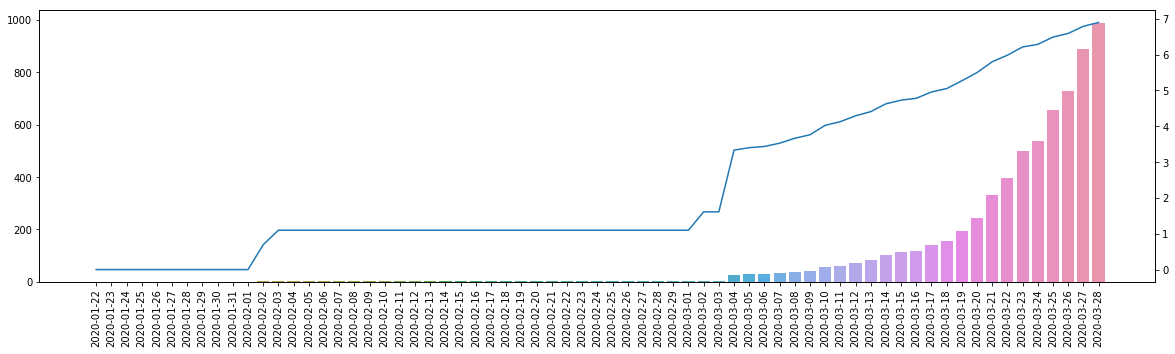

In [7]:
plt.figure(figsize=(20,5))
fig,ax1=plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(y=confirmedGlobal[confirmedGlobal['Country/Region']=='India'].values[0][4:-1],
           x=timeStamp,ax=ax1)
ax2=ax1.twinx()
sns.lineplot(y=[np.log(i) if i !=0  else 0 for i in confirmedGlobal[confirmedGlobal['Country/Region']=='India'].values[0][4:-1]],
           x=timeStamp,ax=ax2)

In [8]:
logVals=[np.log(i) if i !=0  else 0 for i in confirmedGlobal[confirmedGlobal['Country/Region']=='India'].values[0][4:-1]]

In [9]:
def getDataArranged(country):
    temp={}
    def getStartPoint(country):
        for num,i in enumerate(confirmedGlobal[confirmedGlobal['NewContryCode']==country].values[0][4:]):
            if i > 0:
    #             print (num,i)
                break
        return 4+num

    startPoint=getStartPoint(country)
    temp['logValues']=[np.log(i) if i !=0  else 0 for i in confirmedGlobal[confirmedGlobal['NewContryCode']==country].values[0][startPoint:-1]]
    temp['actualValues']=[i for i in confirmedGlobal[confirmedGlobal['NewContryCode']==country].values[0][startPoint:-1]]
    countryData=confirmedGlobal[confirmedGlobal['NewContryCode']==country].values[0][startPoint:-1]
    datesOfInfections=[str(dateutil.parser.parse(i))[:10] for i in confirmedGlobal[confirmedGlobal['NewContryCode']==country].columns[startPoint:-1]]
    dayIndex=['D_'+str(i).zfill(3) for i in range(len(countryData))]
    temp['countryData']=countryData
    temp['datesOfInfections']=datesOfInfections
    temp['dayIndex']=dayIndex
    return temp

In [10]:
countryDataDict={}
for con in tqdm(confirmedGlobal['NewContryCode']):
    try:
        countryDataDict[con]=getDataArranged(con)    
    except:
        pass

100%|████████████████████████████████████████████████████████████████████████████████| 253/253 [00:02<00:00, 88.50it/s]


In [13]:
countryDataDict['Afghanistan'].keys()

dict_keys(['logValues', 'actualValues', 'countryData', 'datesOfInfections', 'dayIndex'])

In [19]:
countryDataDict.keys()

dict_keys(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'AustraliaAustralian Capital Territory', 'AustraliaNew South Wales', 'AustraliaNorthern Territory', 'AustraliaQueensland', 'AustraliaSouth Australia', 'AustraliaTasmania', 'AustraliaVictoria', 'AustraliaWestern Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'CanadaAlberta', 'CanadaBritish Columbia', 'CanadaGrand Princess', 'CanadaManitoba', 'CanadaNew Brunswick', 'CanadaNewfoundland and Labrador', 'CanadaNova Scotia', 'CanadaOntario', 'CanadaPrince Edward Island', 'CanadaQuebec', 'CanadaSaskatchewan', 'Central African Republic', 'Chad', 'Chile', 'ChinaAnhui', 'ChinaBeijing', 'ChinaChongqing', 'ChinaFujian', 'ChinaGansu', 'ChinaGuangdong', 'ChinaGuangxi', 'ChinaGuizhou', 'Ch

<Figure size 1440x360 with 0 Axes>

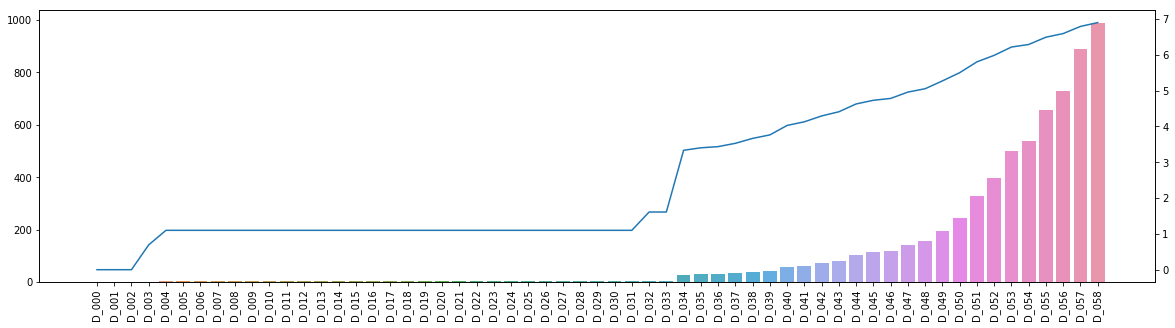

In [58]:
tempX=countryDataDict['India']
plt.figure(figsize=(20,5))
fig,ax1=plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(y=tempX['countryData'],x=tempX['dayIndex'],ax=ax1)
ax2=ax1.twinx()
sns.lineplot(y=tempX['logValues'],x=tempX['dayIndex'],ax=ax2)

<Figure size 1440x360 with 0 Axes>

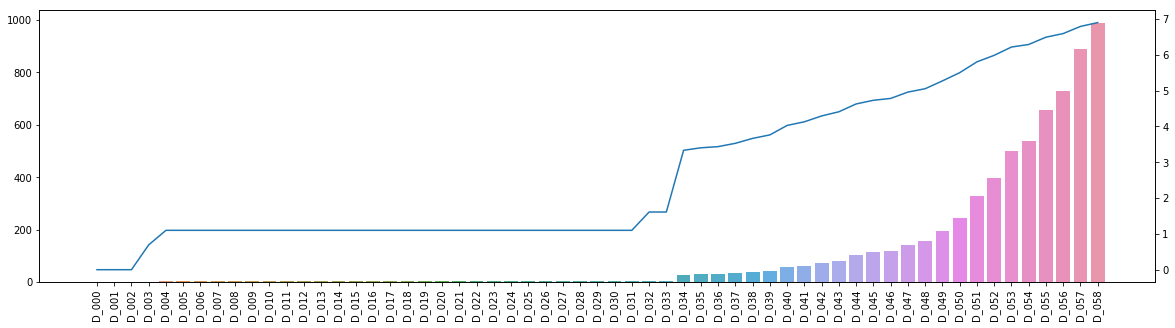

In [41]:
tempX=countryDataDict['India']
plt.figure(figsize=(20,5))
fig,ax1=plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(y=tempX['countryData'],x=tempX['dayIndex'],ax=ax1)
ax2=ax1.twinx()
sns.lineplot(y=tempX['logValues'],x=tempX['dayIndex'],ax=ax2)

In [59]:
fig = {
    "data": [{"type": "bar",
              "y":tempX['countryData'],
              "x": tempX['dayIndex']}],
    "layout": {"title": {"text": "A Bar Chart"}}
}

# To display the figure defined by this dict, use the low-level plotly.io.show function
import plotly.io as pio
pio.show(fig)

In [57]:
countryDataDict.keys()

dict_keys(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'AustraliaAustralian Capital Territory', 'AustraliaNew South Wales', 'AustraliaNorthern Territory', 'AustraliaQueensland', 'AustraliaSouth Australia', 'AustraliaTasmania', 'AustraliaVictoria', 'AustraliaWestern Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'CanadaAlberta', 'CanadaBritish Columbia', 'CanadaGrand Princess', 'CanadaManitoba', 'CanadaNew Brunswick', 'CanadaNewfoundland and Labrador', 'CanadaNova Scotia', 'CanadaOntario', 'CanadaPrince Edward Island', 'CanadaQuebec', 'CanadaSaskatchewan', 'Central African Republic', 'Chad', 'Chile', 'ChinaAnhui', 'ChinaBeijing', 'ChinaChongqing', 'ChinaFujian', 'ChinaGansu', 'ChinaGuangdong', 'ChinaGuangxi', 'ChinaGuizhou', 'Ch

In [62]:
from plotly.subplots import make_subplots
# Create random data with numpy
import numpy as np
np.random.seed(1)

N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N) + 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) - 5

# Create traces
# fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])
tempX=countryDataDict['India']
fig.add_trace(go.Bar(x=tempX['dayIndex'], y=tempX['countryData'],name='India',))
fig.add_trace(go.Scatter(x=tempX['dayIndex'], y=tempX['logValues'],mode='lines'), secondary_y=True)
tempX2=countryDataDict['Italy']
fig.add_trace(go.Bar(x=tempX2['dayIndex'], y=tempX2['countryData'],name='Italy',))
fig.add_trace(go.Scatter(x=tempX2['dayIndex'], y=tempX2['logValues'],mode='lines'), secondary_y=True)

fig.show()